# Import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,MaxAbsScaler,RobustScaler,QuantileTransformer,PowerTransformer
from sklearn.decomposition import PCA,KernelPCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# TSNE

In [3]:
def Tsne(n_components,data):
    t_sne  = TSNE(
        n_components=n_components,
        learning_rate="auto",
        method='barnes_hut', 
        n_jobs=-1, 
        perplexity=30,
        n_iter=300,
        init="pca",
        random_state=42)
    tsne = t_sne.fit_transform(data)
    tsnedf = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
    return tsnedf

# Load Data Frames 

In [4]:
df_Stander = pd.read_csv('Standerdf.csv')
df_Stander.drop(columns='Unnamed: 0',inplace=True)
df_Log = pd.read_csv("Logdf.csv")
df_Log.drop(columns='Unnamed: 0',inplace=True)

In [5]:
df_PCA1 = pd.read_csv('Pcastdf.csv')
df_PCA2 = pd.read_csv("Pcalogdf.csv")
df_KPCA1 = pd.read_csv('Kernalstandrdf.csv')
df_KPCA2 = pd.read_csv("KernalLogdf.csv")

In [6]:
Tsne_st = Tsne(2,df_Stander)
Tsne_log = Tsne(2,df_Log)
Tsne_PCA1 = Tsne(2,df_PCA1)
Tsne_PCA2 = Tsne(2,df_PCA2)
Tsne_KPCA1 = Tsne(2,df_KPCA1)
Tsne_KPCA2 = Tsne(2,df_KPCA2)

## 3. DBSCAN

### 3.1 Transformed Data 

#### 3.1.1 Stander Scaler

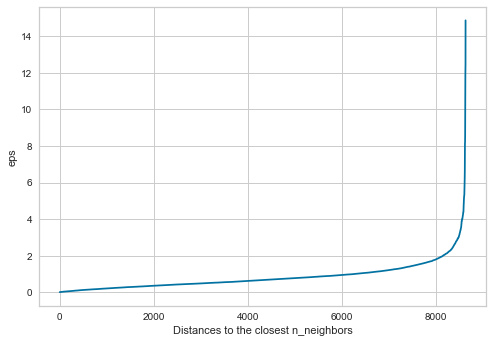

In [7]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df_Stander)
distances, neighbors =nbrs.kneighbors(df_Stander)
# sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel("Distances to the closest n_neighbors")
plt.ylabel("eps")
plt.show()

In [15]:
#Selecting the best eps (the optimal value for epsilon will be found at the point of maximum curvature)
dbs = DBSCAN(eps=1.8)
dbs.fit(df_Stander)

DBSCAN(eps=1.8)

In [16]:
#The labels_ property contains the list of clusters and their respective points
Tsne_st['DBSC Clusters'] = dbs.labels_
px.scatter(Tsne_st, x='feature1', y='feature2', color="DBSC Clusters",title="T-SNE visualization for transformed (Stander) Data using DBSC")

#### 3.1.2 Log Transform

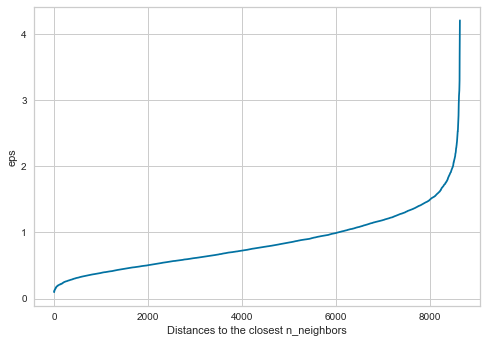

In [33]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(df_Log)
distances, neighbors =nbrs.kneighbors(df_Log)
# sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel("Distances to the closest n_neighbors")
plt.ylabel("eps")
plt.show()

In [34]:
#Selecting the best eps (the optimal value for epsilon will be found at the point of maximum curvature)
dbs = DBSCAN(eps=1.7)
dbs.fit(df_Log)

DBSCAN(eps=1.7)

In [35]:
#The labels_ property contains the list of clusters and their respective points
Tsne_log['DBSC Clusters'] = dbs.labels_
px.scatter(Tsne_log, x='feature1', y='feature2', color="DBSC Clusters",title="T-SNE visualization for transformed (Log) Data using DBSC")

## 3.2 PCA

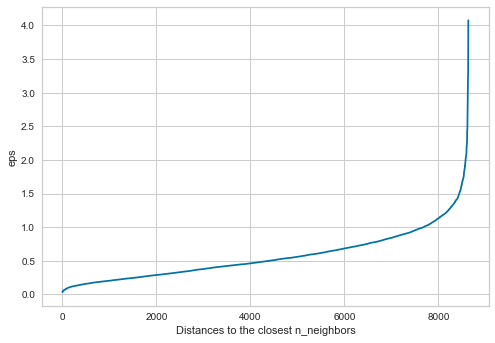

In [36]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df_PCA2)
distances, neighbors =nbrs.kneighbors(df_PCA2)
# sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel("Distances to the closest n_neighbors")
plt.ylabel("eps")
plt.show()

In [37]:
#Selecting the best eps (the optimal value for epsilon will be found at the point of maximum curvature)
dbs = DBSCAN(eps=1.3)
dbs.fit(df_PCA2)

DBSCAN(eps=1.3)

In [38]:
#The labels_ property contains the list of clusters and their respective points
Tsne_PCA2['DBSC Clusters'] = dbs.labels_
px.scatter(Tsne_PCA2, x='feature1', y='feature2', color="DBSC Clusters",title="T-SNE visualization for transformed (Log+PCA) Data using DBSC")

## 3.3 KPCA

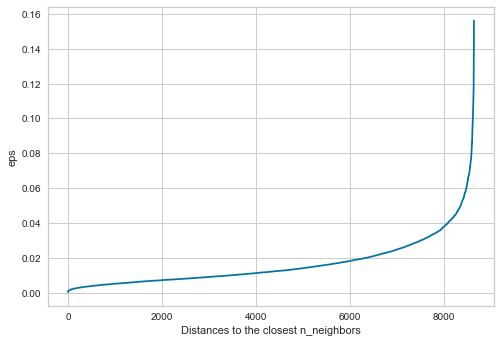

In [50]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df_KPCA2)
distances, neighbors =nbrs.kneighbors(df_KPCA2)
# sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel("Distances to the closest n_neighbors")
plt.ylabel("eps")
plt.show()

In [51]:
#Selecting the best eps (the optimal value for epsilon will be found at the point of maximum curvature)
dbs = DBSCAN(eps=0.05)
dbs.fit(df_KPCA2)

DBSCAN(eps=0.05)

In [52]:
#The labels_ property contains the list of clusters and their respective points
Tsne_KPCA2['DBSC Clusters'] = dbs.labels_
px.scatter(Tsne_KPCA2, x='feature1', y='feature2', color="DBSC Clusters",title="T-SNE visualization for transformed (Log + Kernal PCA) Data using DBSC")